## Objective :- To predict whether employee is looking for new job or not

* **enrollee_id : Unique ID for candidate**

* **city: City code**

* **city_ development _index : Developement index of the city (scaled)**

* **gender: Gender of candidate**

* **relevent_experience: Relevant experience of candidate**

* **enrolled_university: Type of University course enrolled if any**

* **education_level: Education level of candidate**

* **major_discipline :Education major discipline of candidate**

* **experience: Candidate total experience in years**

* **company_size: No of employees in current employer's company**

* **company_type : Type of current employer**

* **lastnewjob: Difference in years between previous job and current job**

* **training_hours: training hours completed**

* **target: 0 – Not looking for job change, 1 – Looking for a job change**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly

### Import Data 

In [2]:
aug = pd.read_csv(r"D:\Capstone_project_1\Employee\aug_train.csv")

In [3]:
aug.shape

(19158, 14)

In [4]:
aug.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
aug = aug.iloc[:,1:]

In [6]:
aug.shape

(19158, 13)

### Missing Value Imputation 

In [6]:
aug.isnull().sum()  # Total nulls present in each columns

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [7]:
aug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 1.9+ MB


In [8]:
missing_columns = aug.columns[aug.isnull().sum()>0]

<BarContainer object of 8 artists>

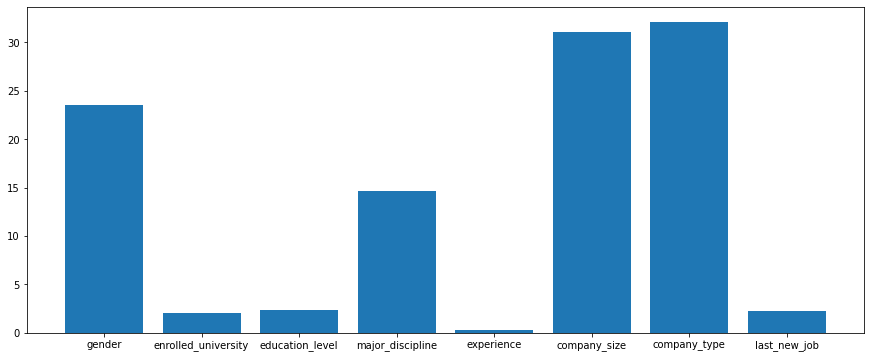

In [12]:
percent_missing = aug[missing_columns].isnull().sum() * 100 / len(aug)
missing_value_df = pd.DataFrame({'column_name': aug[missing_columns].columns,
                                 'percent_missing': percent_missing})

plt.figure(figsize=(15,6))
plt.bar(x=missing_value_df.column_name, height=missing_value_df.percent_missing)

In [10]:
aug.enrolled_university.value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [11]:
aug.gender.fillna("Male",inplace=True)
aug.enrolled_university.fillna("no_enrollment",inplace=True)
aug.education_level.fillna("High School",inplace=True)
aug.major_discipline.fillna("STEM",inplace=True)
aug.experience.fillna("0",inplace=True)
aug.company_size.fillna("50-99",inplace=True)
aug.company_type.fillna("Pvt Ltd",inplace=True)
aug.last_new_job.fillna("1",inplace=True)

In [12]:
aug.enrolled_university.value_counts()

no_enrollment       14203
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

### Exploratory Data Analysis 

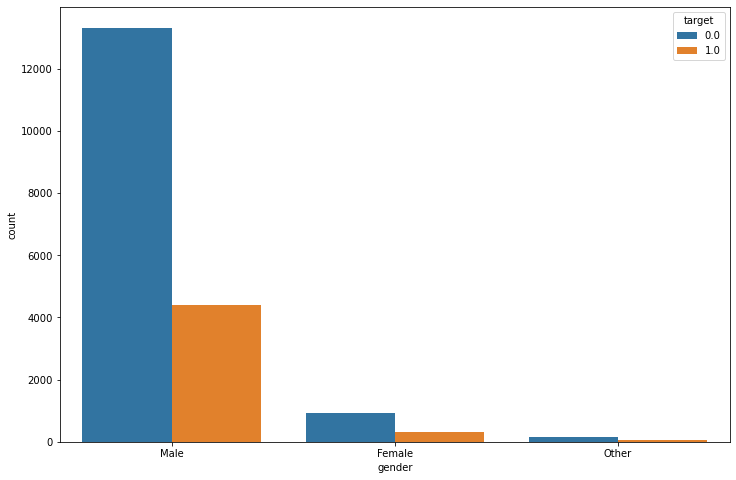

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(data =aug, x='gender', hue='target');

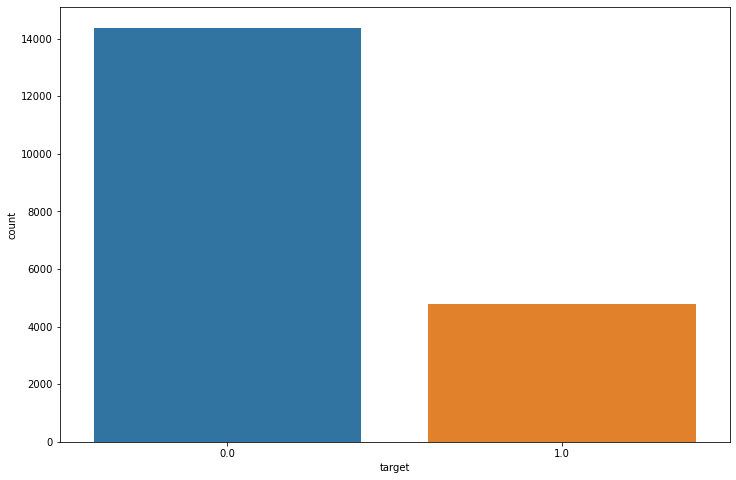

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(data=aug, x='target');

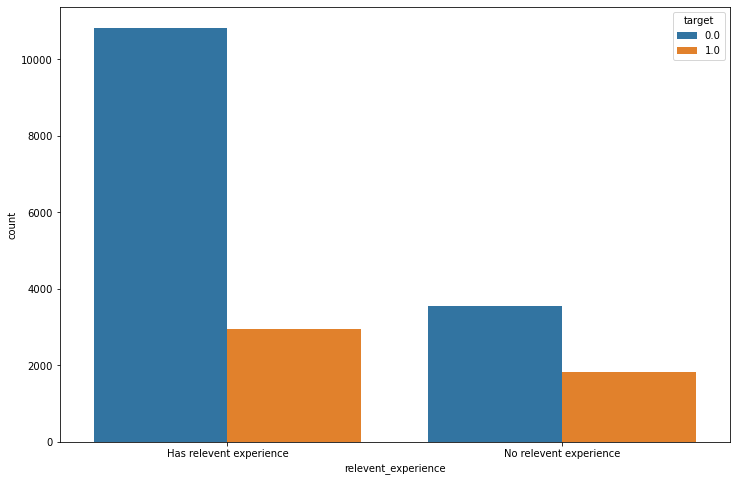

In [15]:
plt.figure(figsize=(12,8))
sns.countplot(x=aug.relevent_experience, hue=aug.target);

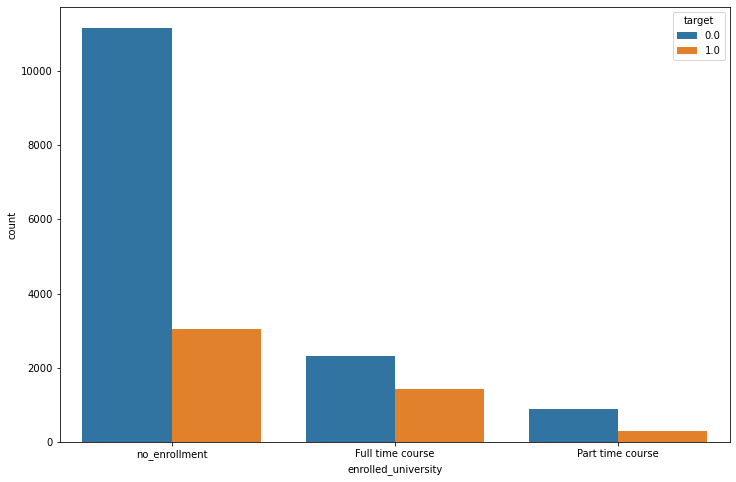

In [16]:
plt.figure(figsize=(12,8))
sns.countplot(data=aug, x='enrolled_university', hue='target');

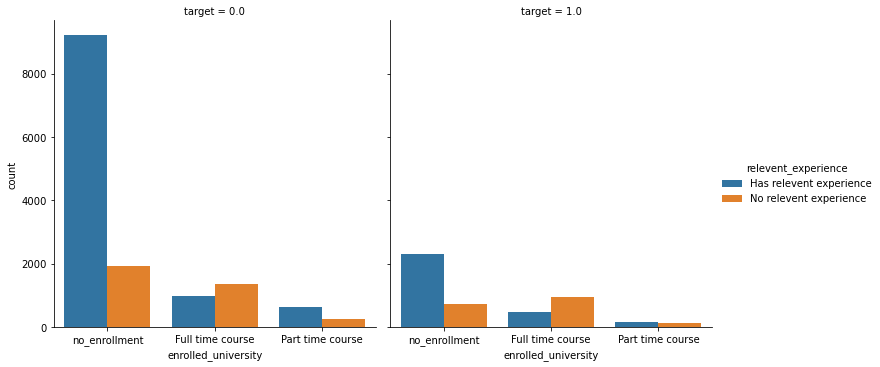

In [17]:
sns.catplot(data=aug, x='enrolled_university', hue='relevent_experience', col='target', kind='count', height=5);

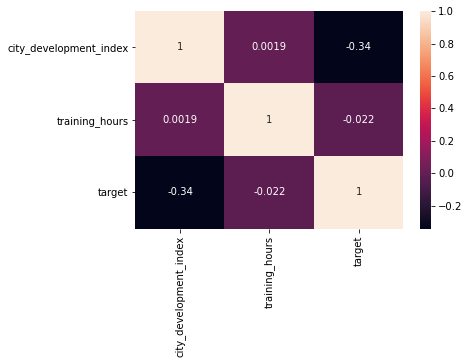

In [18]:
sns.heatmap(aug.corr(), annot=True);

### Converting Categorical variables into Numeric variables 

In [19]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
aug[aug.select_dtypes(include=['object']).columns] =aug[aug.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [20]:
aug_x = aug.iloc[:,:-1]
aug_y = aug.iloc[:,-1]

In [21]:
from sklearn.model_selection import train_test_split
aug_x_train, aug_x_test, aug_y_train, aug_y_test = train_test_split(aug_x,aug_y, test_size=.2)

In [22]:
aug_y_train.value_counts()

0.0    11475
1.0     3851
Name: target, dtype: int64

Now.... Here we can see that there is a problem of Class Imbalance

So we can solve this problem either by manually doing oversampling and undersampling or we can use SMOTE
(Synthetic Minority Oversampling Technique)

Here we are going to use SMOTE

In [23]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy="minority")
aug_x_train1, aug_y_train1 = sm.fit_resample(aug_x_train,aug_y_train)

In [24]:
aug_y_train1.value_counts()

0.0    11475
1.0    11475
Name: target, dtype: int64

### Model Selection 

#### Logistic Regression 

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
lr = LogisticRegression()

lr.fit(aug_x_train1,aug_y_train1)

pred_lr = lr.predict(aug_x_test)

print(classification_report(aug_y_test,pred_lr))

              precision    recall  f1-score   support

         0.0       0.81      0.65      0.72      2906
         1.0       0.33      0.54      0.41       926

    accuracy                           0.62      3832
   macro avg       0.57      0.59      0.56      3832
weighted avg       0.70      0.62      0.65      3832



C:\Users\manis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [26]:
pred_prob_train = lr.predict_proba(aug_x_train1)
pred_prob_test  = lr.predict_proba(aug_x_test)

pred_prob_test = pd.DataFrame(pred_prob_test)

pred_prob_test.rename(columns ={pred_prob_test.columns[0]: "Pred_Prob0" , 
                                pred_prob_test.columns[1]: "Pred_prob1"} , inplace = True)
pred_prob_test.head()

,Pred_Prob0,Pred_prob1
0,0.535046,0.464954
1,0.712478,0.287522
2,0.854465,0.145535
3,0.441976,0.558024
4,0.407618,0.592382


AUROC CURVE =  0.592


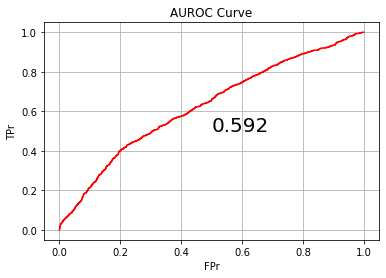

In [27]:
from sklearn.metrics import  roc_curve , roc_auc_score
fpr , tpr , thershold = roc_curve(aug_y_test , pred_prob_test.iloc[: , 1] ) 
area_auroc = roc_auc_score(aug_y_test , pred_lr)
area_auroc = np.round(area_auroc , 3)
print('AUROC CURVE = ' , area_auroc )

plt.plot(fpr , tpr , color = "r")
plt.xlabel("FPr")
plt.ylabel("TPr")
plt.title("AUROC Curve")
plt.text(x = 0.5 , y = 0.5, s = area_auroc , size = 20)
plt.grid()

In [28]:
model=[]
accuracy = []
recall = []
precision = []
f1 = []

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model.append("Logistic Regression")
accuracy.append(accuracy_score(aug_y_test,pred_lr))
recall.append(recall_score(aug_y_test,pred_lr))
precision.append(precision_score(aug_y_test,pred_lr))
f1.append(f1_score(aug_y_test,pred_lr))

------------------------------------------------------------------------------------------------------------------------

#### KNN 

In [30]:
k = int(np.sqrt(aug.shape[0]))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(aug_x_train1,aug_y_train1)

pred_knn = knn.predict(aug_x_test)

print(classification_report(aug_y_test,pred_knn))

              precision    recall  f1-score   support

         0.0       0.83      0.69      0.75      2906
         1.0       0.36      0.55      0.43       926

    accuracy                           0.65      3832
   macro avg       0.59      0.62      0.59      3832
weighted avg       0.71      0.65      0.67      3832



In [31]:
model.append("KNN")
accuracy.append(accuracy_score(aug_y_test,pred_knn))
recall.append(recall_score(aug_y_test,pred_knn))
precision.append(precision_score(aug_y_test,pred_knn))
f1.append(f1_score(aug_y_test,pred_knn))

--------------------------------------------------------------------------------------------------------------------------

#### Decision Tree 

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(aug_x_train1,aug_y_train1)

pred_dt = dt.predict(aug_x_test)

print(classification_report(aug_y_test,pred_dt))

              precision    recall  f1-score   support

         0.0       0.82      0.73      0.77      2906
         1.0       0.36      0.49      0.42       926

    accuracy                           0.67      3832
   macro avg       0.59      0.61      0.59      3832
weighted avg       0.71      0.67      0.68      3832



In [33]:
model.append("Decision Tree")
accuracy.append(accuracy_score(aug_y_test,pred_dt))
recall.append(recall_score(aug_y_test,pred_dt))
precision.append(precision_score(aug_y_test,pred_dt))
f1.append(f1_score(aug_y_test,pred_dt))

-------------------------------------------------------------------------------------------------------------------------

#### Decision Tree with grid search

In [34]:
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier()

search_dict={'criterion':('entropy','gini'),'max_depth':(4,5,6,7),'min_samples_split':(50,75,100)}

grid_dt=GridSearchCV(dt,param_grid=search_dict)

grid_dt.fit(aug_x_train1,aug_y_train1)

print(grid_dt.best_params_)

pred_grid_dt=grid_dt.predict(aug_x_test)

tab_grid_dt = confusion_matrix(aug_y_test, pred_grid_dt)
print(tab_grid_dt)

print(classification_report(aug_y_test, pred_grid_dt))

{'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 75}
[[2293  613]
 [ 398  528]]
              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82      2906
         1.0       0.46      0.57      0.51       926

    accuracy                           0.74      3832
   macro avg       0.66      0.68      0.67      3832
weighted avg       0.76      0.74      0.74      3832



In [35]:
model.append("Decision Tree with grid search")
accuracy.append(accuracy_score(aug_y_test,pred_grid_dt))
recall.append(recall_score(aug_y_test,pred_grid_dt))
precision.append(precision_score(aug_y_test,pred_grid_dt))
f1.append(f1_score(aug_y_test,pred_grid_dt))

--------------------------------------------------------------------------------------------------------------------------

#### Random Forest 

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(aug_x_train1,aug_y_train1)

pred_rf = rf.predict(aug_x_test)

from sklearn.metrics import confusion_matrix,classification_report
tab_rf = confusion_matrix(aug_y_test, pred_rf)
print(tab_rf)

print(classification_report(aug_y_test,pred_rf))

[[2353  553]
 [ 463  463]]
              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82      2906
         1.0       0.46      0.50      0.48       926

    accuracy                           0.73      3832
   macro avg       0.65      0.65      0.65      3832
weighted avg       0.74      0.73      0.74      3832



In [37]:
model.append("Random Forest")
accuracy.append(accuracy_score(aug_y_test,pred_rf))
recall.append(recall_score(aug_y_test,pred_rf))
precision.append(precision_score(aug_y_test,pred_rf))
f1.append(f1_score(aug_y_test,pred_rf))

-------------------------------------------------------------------------------------------------------------------------

#### Random Forest with Grid Search 

In [38]:
search_dict={'criterion':('entropy','gini'),'n_estimators':(100,150,200)}

from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
grid_rf=GridSearchCV(rf,param_grid=search_dict)

grid_rf.fit(aug_x_train1, aug_y_train1)

print(grid_rf.best_params_)

pred_grid_rf = grid_rf.predict(aug_x_test)

tab_grid_rf = confusion_matrix(aug_y_test, pred_grid_rf)
print(tab_grid_rf)

print(classification_report(aug_y_test, pred_grid_rf))

{'criterion': 'entropy', 'n_estimators': 200}
[[2335  571]
 [ 443  483]]
              precision    recall  f1-score   support

         0.0       0.84      0.80      0.82      2906
         1.0       0.46      0.52      0.49       926

    accuracy                           0.74      3832
   macro avg       0.65      0.66      0.65      3832
weighted avg       0.75      0.74      0.74      3832



In [39]:
model.append("Random Forest with grid search")
accuracy.append(accuracy_score(aug_y_test,pred_rf))
recall.append(recall_score(aug_y_test,pred_rf))
precision.append(precision_score(aug_y_test,pred_rf))
f1.append(f1_score(aug_y_test,pred_rf))

-------------------------------------------------------------------------------------------------------------------------

### Model Evaluation 

In [40]:
# To evaluate the performance of the model we have created a dataframe based on their accuracy, recall, precision and f1 score

Evaluation_df = pd.DataFrame({"Model":model, "Accuracy":accuracy, "Recall":recall, "Precision":precision, "F1_score":f1})
Evaluation_df

,Model,Accuracy,Recall,Precision,F1_score
0,Logistic Regression,0.620564,0.536717,0.326544,0.406046
1,KNN,0.653706,0.547516,0.358304,0.433148
2,Decision Tree,0.669885,0.494600,0.364940,0.419991
3,Decision Tree with grid search,0.736169,0.570194,0.462752,0.510885
4,Random Forest,0.734864,0.500000,0.455709,0.476828
5,Random Forest with grid search,0.734864,0.500000,0.455709,0.476828


We can see that Decision tree with grid search and Random Forest with grid search are giving good results as compared to other models.